In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [3]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến

    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """

    pop = np.random.randint(2, size=(num_individuals, num_variables))

    return pop

# np.random.seed(42)
pop = initialize_population(8,4)
print(pop)

[[0 0 0 0]
 [1 0 1 1]
 [1 0 1 1]
 [0 1 0 1]
 [0 1 0 1]
 [1 1 0 0]
 [0 1 1 1]
 [0 1 1 1]]


In [4]:
popA = np.array([[0,0,0,0],
                [0,0,0,1]])
np.unique(popA, axis = 0).shape[0]

2

In [5]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind)

    return value

onemax(pop[5,:])

2

In [6]:
def leadingone (ind):
    try:
        return list(ind).index(0)
    except ValueError:
        return len(ind)

A = np.array([1,1,1,0,1])
B = np.array([0,1,1,1,1])
C = np.array([1,1,0,1,1])
D = np.array([1,1,1,1,1])
E = np.array([0,0,1,1,1])

leadingone(A), leadingone(B), leadingone(C), leadingone(D), leadingone(E)

(3, 0, 2, 5, 0)

In [7]:
def trap_5 (ind):
    u = np.sum(ind)
    if u == 5:
        return 5
    else:
        return 5 - u - 1

A = np.array([1,0,0,0,0])
B = np.array([0,1,1,0,0])
C = np.array([1,0,0,1,1])
D = np.array([1,1,1,1,1])

print (trap_5(A))
print (trap_5(B))
print (trap_5(C))
print (trap_5(D))

print("----")


def concatenate_trap_5 (ind):
    return np.sum([trap_5(ind[i:i+5]) for i in range(0, len(ind), 5)])

print(concatenate_trap_5(np.concatenate((A,B)))) 
print(concatenate_trap_5(np.concatenate((C,D))))
print(concatenate_trap_5(np.concatenate((A,D))))
print(concatenate_trap_5(np.concatenate((C,B))))

3
2
1
5
----
5
6
8
3


In [8]:
def uniform_crossover( pop , verbose = False):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    if verbose:
        print(pop[indices])

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = pop[idx1]
        offspring2 = pop[idx2]

        # Cài đặt phép lai đồng nhất uniform crossover.
        r_mask = np.random.uniform(0,1, size = num_parameters)
        if verbose:
            print(r_mask)
            
        temp = offspring2[r_mask < 0.5].copy()
        offspring2[r_mask < 0.5] = offspring1[r_mask < 0.5]
        offspring1[r_mask < 0.5] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    return np.array(offspring)

uniform_crossover( pop, verbose = True )

[[1 0 1 1]
 [0 1 0 1]
 [1 1 0 0]
 [0 1 0 1]
 [1 0 1 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 0 0 0]]
[0.12357287 0.29033574 0.63763533 0.37482243]
[0.91972387 0.70608772 0.68139498 0.43978344]
[0.86242499 0.71110584 0.09504657 0.08352417]
[0.95477815 0.98445526 0.17780077 0.12706497]


array([[0, 1, 1, 1],
       [1, 0, 0, 1],
       [1, 1, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 1]])

In [9]:
def onepoint_crossover( pop , verbose = False):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    if verbose:
        print(pop[indices])

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = pop[idx1]
        offspring2 = pop[idx2]

        # Cài đặt phép lai một điểm.
        r = np.random.randint(1,num_parameters)
        if verbose:
            print(f"o1: {offspring1}")
            print(f"o2: {offspring2}")
            print(r)
            
        
        temp = offspring2[r:].copy()
        offspring2[r:] = offspring1[r:]
        offspring1[r:] = temp
        
        if verbose:
            print(f"o1: {offspring1}")
            print(f"o2: {offspring2}")
            print()
        
        offspring.append(offspring1)
        offspring.append(offspring2)

    return np.array(offspring)

onepoint_crossover( pop, verbose = True )

[[0 1 1 1]
 [1 0 1 1]
 [0 1 0 0]
 [1 1 0 1]
 [0 1 0 0]
 [0 1 1 1]
 [0 0 1 1]
 [1 0 0 1]]
o1: [0 1 1 1]
o2: [1 0 1 1]
1
o1: [0 0 1 1]
o2: [1 1 1 1]

o1: [0 1 0 0]
o2: [1 1 0 1]
2
o1: [0 1 0 1]
o2: [1 1 0 0]

o1: [0 1 0 0]
o2: [0 1 1 1]
3
o1: [0 1 0 1]
o2: [0 1 1 0]

o1: [0 0 1 1]
o2: [1 0 0 1]
1
o1: [0 0 0 1]
o2: [1 0 1 1]



array([[0, 0, 1, 1],
       [1, 1, 1, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 1, 1]])

In [10]:
def tournament_selection (pop, pop_fitness, selection_size, tournament_size = 4, verbose = False):
    count = 0
    pop_fitness_index = np.arange(0,len(pop_fitness))
    indices = []
    while len(indices) != selection_size:
        shuffled_index = np.random.permutation(pop_fitness_index)
        if verbose:
            print("shuffled_index", shuffled_index)
            print("shuffled_fitness",pop_fitness[shuffled_index])
            
        for i in range(0,len(pop_fitness), tournament_size):
            winner_index = np.argmax(pop_fitness[shuffled_index[i:i+tournament_size]])
            index = shuffled_index[i:i+tournament_size][winner_index]
            indices.append(index)
            
            if verbose:
                print(index)
            
    
    return np.array(indices)

pop_fitness = np.random.randint(0,8,size=8)
print("pop_fitness", pop_fitness)
indices = tournament_selection(None, pop_fitness, 8, verbose = True)
print(indices)

pop_fitness [7 7 5 1 7 2 0 7]
shuffled_index [4 1 2 0 3 6 7 5]
shuffled_fitness [7 7 5 7 1 0 7 2]
4
7
shuffled_index [1 2 3 6 0 5 7 4]
shuffled_fitness [7 5 1 0 7 2 7 7]
1
0
shuffled_index [7 6 3 0 2 5 4 1]
shuffled_fitness [7 0 1 7 5 2 7 7]
7
4
shuffled_index [3 0 2 4 1 7 5 6]
shuffled_fitness [1 7 5 7 7 7 2 0]
0
1
[4 7 1 0 7 4 0 1]


In [11]:
def POPOP_genetic_algorithm(objective,
                            selection,
                            variance,
                            num_individuals, 
                            num_parameters, 
                            max_evaluations, 
                            early_stop = False,
                            verbose=False):
    
    pop = initialize_population(num_individuals, num_parameters)     # Khởi tạo quần thể
    pop_fitness = np.array([objective(ind) for ind in pop])    # Tính fitness của từng cá thể
    i = 0   # Thế hệ thứ 0
    
    num_evaluations = num_individuals  # Số lượng gọi hàm tính độ thích nghi = Số lượng cá thể
    best_fitness = []
    
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)
    
    selection_size = num_individuals     # Xác định size của tập chọn lọc

    while num_evaluations < max_evaluations:
        best_fitness.append([num_evaluations, np.max(pop_fitness)])
        
        # Biến đổi
        offspring = variance(pop)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        
        # P+O pool
        pool = np.vstack([pop, offspring])
        pool_fitness = np.concatenate((pop_fitness, offspring_fitness))
        
        # Chọn lọc
        selected_indices = selection( pool, pool_fitness, selection_size )
        selection_set = pool[selected_indices]
        selection_fitness = pool_fitness[selected_indices]

        num_evaluations += len(offspring) # Cập nhật lại
        
        # Quần thể thế hệ tiếp theo
        pop = selection_set
        pop_fitness = selection_fitness
        i += 1
        
        if verbose:
            print(f'#Gen {i}:')
            print(pop_fitness)

        # Kiểm tra hội tụ
        if early_stop:
            if np.unique(pop, axis = 0).shape[0] == 1:
                break
                
        
    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)

In [12]:
concatenate_trap_5([1]*10)

10

In [13]:
def find_upperbound (objective, variance,  num_parameters, ith_bisection):
    n_trials = 10
    optimal_fitness = objective([1]*num_parameters)
    n_individuals = [4,8,16,32,64,128,256,512,1024,2048,4096,8192]
    
    for N_upper in n_individuals:
        number_of_evaluations = []
        
        for i in range (n_trials):
            np.random.seed(21522490 + i + 10*ith_bisection)
            pop, pop_fitness, best_fitness = POPOP_genetic_algorithm(
                objective = objective,
                selection = tournament_selection,
                variance = variance,
                num_individuals = N_upper, 
                num_parameters = num_parameters, 
                max_evaluations = 100000,
                early_stop = True
            )
            number_of_evaluations.append(best_fitness[-1][0])
            
            
            if best_fitness[-1][1] != optimal_fitness:
                break
                
        else:
            average_number_of_evaluations = np.average(number_of_evaluations)
            return N_upper, average_number_of_evaluations

In [14]:
find_upperbound(leadingone,uniform_crossover, 10, 0)

(64, 1216.0)

In [15]:
def find_MRPS (N_upper, objective, variance, num_parameters, ith_bisection):
    n_trials = 10
    N_lower = N_upper/2
    optimal_fitness = objective([1]*num_parameters)
    
    average_number_of_evaluations = -1

    while ( (N_upper - N_lower)/2 > 0.1 ):
        
        N = (N_upper + N_lower)/2
        number_of_evaluations = []

        for i in range(n_trials):
            np.random.seed(21522490 + i + 10*ith_bisection)
            pop, pop_fitness, best_fitness = POPOP_genetic_algorithm(
                objective = objective,
                selection = tournament_selection,
                variance = variance,
                num_individuals = int(N),
                num_parameters = num_parameters, 
                max_evaluations = 100000,
                early_stop = True
            )
            number_of_evaluations.append(best_fitness[-1][0])
            
            if best_fitness[-1][1] != optimal_fitness:
                N_lower = N
                break
                
        else:
            N_upper = N
            average_number_of_evaluations = np.average(number_of_evaluations)
#             print(N_upper, average_number_of_evaluations)
        
        if (N_upper - N_lower) <= 2:
            break
            
    return N_upper, average_number_of_evaluations

In [16]:
find_MRPS(64, leadingone, uniform_crossover, 10, 0)

(40.0, 600.0)

In [17]:
def bisection(objective,variance, num_parameters, ith_bisection):
    result_1 = find_upperbound(
        objective = objective, 
        variance= variance,
        num_parameters = num_parameters, 
        ith_bisection = ith_bisection
    )
    
    if result_1 == None:
        return None, None
        
    N_upper, avg_N_upper = result_1
    MRPS, avg_MRPS = find_MRPS(
        N_upper = N_upper, 
        objective = objective,
        variance= variance,
        num_parameters = num_parameters, 
        ith_bisection = ith_bisection
    )
    
    if N_upper == MRPS:
        return N_upper, avg_N_upper
    else:
        return MRPS, avg_MRPS

In [18]:
print(bisection(leadingone,uniform_crossover, 10, 0))

(40.0, 600.0)


# Experiment_time

## OneMax

### Uniform Crossover

In [19]:
problem_size  = np.array([10, 20, 40, 80, 160])
n_trials = 10

final_results_onemax_UX = {}
for num_parameters in tqdm(problem_size, desc = "Problem_size"):
    final_results_onemax_UX[f"problem_size {num_parameters}"] = []
    
    for i in tqdm(range (n_trials),desc = "bisection"):
        result = bisection(
            objective = onemax,
            variance= uniform_crossover,
            num_parameters = num_parameters, 
            ith_bisection = i
        )
        
        if result != (None,None):
            final_results_onemax_UX[f"problem_size {num_parameters}"].append(result)
        else:
            final_results_onemax_UX[f"problem_size {num_parameters}"] = [(None,None)]
            break
        
final_results_onemax_UX

Problem_size: 100%|██████████| 5/5 [06:06<00:00, 73.24s/it] 


{'problem_size 10': [(26.0, 312.0),
  (22.0, 272.8),
  (22.0, 268.4),
  (26.0, 327.6),
  (22.0, 297.0),
  (22.0, 288.2),
  (20.0, 236.0),
  (20.0, 246.0),
  (24.0, 307.2),
  (20.0, 206.0)],
 'problem_size 20': [(42.0, 701.4),
  (38.0, 596.6),
  (28.0, 445.2),
  (34.0, 547.4),
  (36.0, 601.2),
  (40.0, 708.0),
  (32, 553.6),
  (40.0, 640.0),
  (36.0, 586.8),
  (32, 531.2)],
 'problem_size 40': [(68.0, 1428.0),
  (46.0, 1048.8),
  (56.0, 1220.8),
  (66.0, 1452.0),
  (62.0, 1376.4),
  (62.0, 1469.4),
  (56.0, 1276.8),
  (62.0, 1351.6),
  (68.0, 1414.4),
  (58.0, 1334.0)],
 'problem_size 80': [(96.0, 2899.2),
  (98.0, 2871.4),
  (98.0, 3067.4),
  (96.0, 2832.0),
  (98.0, 3018.4),
  (80.0, 2360.0),
  (80.0, 2392.0),
  (108.0, 3229.2),
  (130.0, 3900.0),
  (102.0, 3121.2)],
 'problem_size 160': [(144.0, 5803.2),
  (136.0, 5521.6),
  (194.0, 7566.0),
  (178.0, 6959.8),
  (128, 5094.4),
  (194.0, 7779.4),
  (138.0, 5589.0),
  (194.0, 7643.6),
  (150.0, 6165.0),
  (146.0, 5767.0)]}

* **Đây là kết quả chạy thực nghiệm 10 lần bisection** (Mỗi problem size là 10 lần bisection)
* Kết quả: 
    * bên trái là MRPS 
    * bên phải là Average_number_of_evaluations của 1 bisection 
(Average_number_of_evaluations được tính bằng cách lấy mean của 10 lần chạy thành công trong một bisection)

In [20]:
final_results_onemax_UX_average = {}
final_results_onemax_UX_std = {}

for i in problem_size:
    if final_results_onemax_UX[f'problem_size {i}'] == [(None,None)]:
        final_results_onemax_UX_average[f'problem_size {i}'] = np.array([None,None])
        final_results_onemax_UX_std[f'problem_size {i}'] = np.array([None,None])
    
    else:
        final_results_onemax_UX_average[f'problem_size {i}'] = np.average(final_results_onemax_UX[f'problem_size {i}'], 
                                                                      axis = 0)
        final_results_onemax_UX_std[f'problem_size {i}'] = np.std(final_results_onemax_UX[f'problem_size {i}'], 
                                                              axis = 0)

final_results_onemax_UX_average, final_results_onemax_UX_std

({'problem_size 10': array([ 22.4 , 276.12]),
  'problem_size 20': array([ 35.8 , 591.14]),
  'problem_size 40': array([  60.4 , 1337.22]),
  'problem_size 80': array([  98.6 , 2969.08]),
  'problem_size 160': array([ 160.2, 6388.9])},
 {'problem_size 10': array([ 2.15406592, 36.04122085]),
  'problem_size 20': array([ 4.14246304, 75.20931059]),
  'problem_size 40': array([  6.37495098, 121.23789672]),
  'problem_size 80': array([ 13.38805438, 413.12583265]),
  'problem_size 160': array([ 25.35271189, 952.20630223])})

* **Phần bên trên là kết quả trung bình**: 
    * Ứng với problem size: 
        * Bên trái là giá trị MRPS trung bình của 10 lần bisection
        * Bên phải là giá trị Average_number_of_evaluations trung bình của 10 lần bisection
* **Phần dưới là độ lệch chuẩn**:
    * Ứng với problem size: 
        * Bên trái là độ lệch chuẩn của MRPS của 10 lần bisection
        * Bên phải là độ lệch chuẩn của Average_number_of_evaluations trung bình của 10 lần bisection

In [21]:
MRPS_onemax_UX_average = np.array([values[0] for values in final_results_onemax_UX_average.values()])
MRPS_onemax_UX_std = np.array([values[0] for values in final_results_onemax_UX_std.values()])
n_evaluations_onemax_UX_average = np.array([values[1] for values in final_results_onemax_UX_average.values()])
n_evaluations_onemax_UX_std = np.array([values[1] for values in final_results_onemax_UX_std.values()])

### Onepoint Crossover

In [22]:
problem_size  = np.array([10, 20, 40, 80, 160])
n_trials = 10

final_results_onemax_1X = {}
for num_parameters in tqdm(problem_size, desc = "Problem_size"):
    final_results_onemax_1X[f"problem_size {num_parameters}"] = []
    
    for i in tqdm(range (n_trials),desc = "bisection"):
        result = bisection(
            objective = onemax, 
            variance = onepoint_crossover,
            num_parameters = num_parameters, 
            ith_bisection = i
        )
        
        if result != (None,None):
            final_results_onemax_1X[f"problem_size {num_parameters}"].append(result)
        else:
            final_results_onemax_1X[f"problem_size {num_parameters}"] = [(None,None)]
            break
        
final_results_onemax_1X

Problem_size: 100%|██████████| 5/5 [26:12<00:00, 314.59s/it]


{'problem_size 10': [(36.0, 414.0),
  (34.0, 418.2),
  (28.0, 378.0),
  (24.0, 278.4),
  (24.0, 326.4),
  (30.0, 393.0),
  (20.0, 264.0),
  (22.0, 290.4),
  (28.0, 341.6),
  (30.0, 387.0)],
 'problem_size 20': [(58.0, 1009.2),
  (64, 1196.8),
  (72.0, 1252.8),
  (64, 1088.0),
  (66.0, 1207.8),
  (62.0, 1097.4),
  (48.0, 868.8),
  (68.0, 1237.6),
  (62.0, 1035.4),
  (66.0, 1188.0)],
 'problem_size 40': [(182.0, 4641.0),
  (176.0, 4523.2),
  (128, 3315.2),
  (172.0, 4781.6),
  (258.0, 6888.6),
  (194.0, 4888.8),
  (160.0, 4080.0),
  (164.0, 4214.8),
  (148.0, 3729.6),
  (178.0, 4699.2)],
 'problem_size 80': [(484.0, 17472.4),
  (642.0, 23304.6),
  (442.0, 16928.6),
  (616.0, 23100.0),
  (484.0, 17666.0),
  (668.0, 23847.6),
  (540.0, 20412.0),
  (506.0, 18114.8),
  (584.0, 21257.6),
  (532.0, 18832.8)],
 'problem_size 160': [(None, None)]}

* **Đây là kết quả chạy thực nghiệm 10 lần bisection** (Mỗi problem size là 10 lần bisection)
* Kết quả: 
    * bên trái là MRPS 
    * bên phải là Average_number_of_evaluations của 1 bisection 
(Average_number_of_evaluations được tính bằng cách lấy mean của 10 lần chạy thành công trong một bisection)

In [23]:
final_results_onemax_1X_average = {}
final_results_onemax_1X_std = {}

for i in problem_size:
    if final_results_onemax_1X[f'problem_size {i}'] == [(None,None)]:
        final_results_onemax_1X_average[f'problem_size {i}'] = np.array([None,None])
        final_results_onemax_1X_std[f'problem_size {i}'] = np.array([None,None])
    
    else:
        final_results_onemax_1X_average[f'problem_size {i}'] = np.average(final_results_onemax_1X[f'problem_size {i}'], 
                                                                      axis = 0)
        final_results_onemax_1X_std[f'problem_size {i}'] = np.std(final_results_onemax_1X[f'problem_size {i}'], 
                                                              axis = 0)

final_results_onemax_1X_average, final_results_onemax_1X_std

({'problem_size 10': array([ 27.6, 349.1]),
  'problem_size 20': array([  63.  , 1118.18]),
  'problem_size 40': array([ 176. , 4576.2]),
  'problem_size 80': array([  549.8 , 20093.64]),
  'problem_size 160': array([None, None], dtype=object)},
 {'problem_size 10': array([ 4.88262225, 54.26175449]),
  'problem_size 20': array([  6.14817046, 115.64322548]),
  'problem_size 40': array([ 32.54535297, 905.14726316]),
  'problem_size 80': array([  71.15869588, 2513.64625164]),
  'problem_size 160': array([None, None], dtype=object)})

* **Phần bên trên là kết quả trung bình**: 
    * Ứng với problem size: 
        * Bên trái là giá trị MRPS trung bình của 10 lần bisection
        * Bên phải là giá trị Average_number_of_evaluations trung bình của 10 lần bisection
* **Phần dưới là độ lệch chuẩn**:
    * Ứng với problem size: 
        * Bên trái là độ lệch chuẩn của MRPS của 10 lần bisection
        * Bên phải là độ lệch chuẩn của Average_number_of_evaluations trung bình của 10 lần bisection

In [24]:
MRPS_onemax_1X_average = np.array([values[0] for values in final_results_onemax_1X_average.values()])
MRPS_onemax_1X_std = np.array([values[0] for values in final_results_onemax_1X_std.values()])
n_evaluations_onemax_1X_average = np.array([values[1] for values in final_results_onemax_1X_average.values()])
n_evaluations_onemax_1X_std = np.array([values[1] for values in final_results_onemax_1X_std.values()])

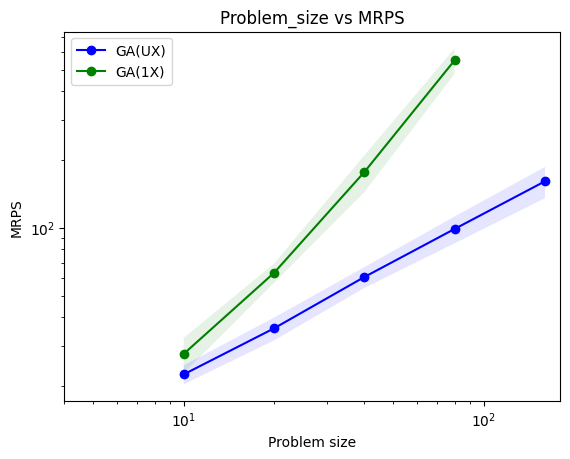

In [25]:
plt.figure()
plt.plot(
    problem_size[MRPS_onemax_UX_average != None],
    MRPS_onemax_UX_average[MRPS_onemax_UX_average != None].astype(float),
    marker='o',
    color= 'b',
    label = "GA(UX)"
)

plt.fill_between(
    problem_size[MRPS_onemax_UX_average != None],
    MRPS_onemax_UX_average[MRPS_onemax_UX_average != None].astype(float) + MRPS_onemax_UX_std[MRPS_onemax_UX_std != None].astype(float),
    MRPS_onemax_UX_average[MRPS_onemax_UX_average != None].astype(float) - MRPS_onemax_UX_std[MRPS_onemax_UX_std != None].astype(float),
    facecolor='b', 
    alpha=0.1
)

plt.plot(
    problem_size[MRPS_onemax_1X_average != None],
    MRPS_onemax_1X_average[MRPS_onemax_1X_average != None].astype(float),
    marker='o',
    color= 'g',
    label = "GA(1X)"
)

plt.fill_between(
    problem_size[MRPS_onemax_1X_average != None],
    MRPS_onemax_1X_average[MRPS_onemax_1X_average != None].astype(float) + MRPS_onemax_1X_std[MRPS_onemax_1X_std != None].astype(float),
    MRPS_onemax_1X_average[MRPS_onemax_1X_average != None].astype(float) - MRPS_onemax_1X_std[MRPS_onemax_1X_std != None].astype(float),
    facecolor='g', 
    alpha=0.1
)
plt.title("Problem_size vs MRPS")
plt.xlabel('Problem size')
plt.xlim(4, 180)
plt.ylabel('MRPS')
plt.xscale('log')
plt.yscale('log')
plt.legend()


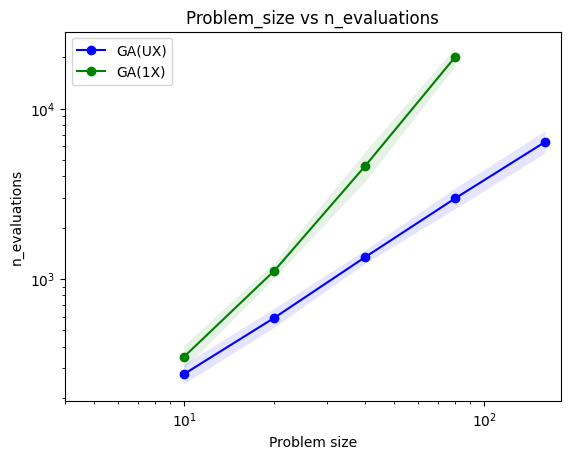

In [26]:
plt.figure()
plt.plot(
    problem_size[n_evaluations_onemax_UX_average != None],
    n_evaluations_onemax_UX_average[n_evaluations_onemax_UX_average != None].astype(float),
    marker='o',
    color= 'b',
    label = "GA(UX)"
)

plt.fill_between(
    problem_size[n_evaluations_onemax_UX_average != None],
    n_evaluations_onemax_UX_average[n_evaluations_onemax_UX_average != None].astype(float) + n_evaluations_onemax_UX_std[n_evaluations_onemax_UX_std != None].astype(float),
    n_evaluations_onemax_UX_average[n_evaluations_onemax_UX_average != None].astype(float) - n_evaluations_onemax_UX_std[n_evaluations_onemax_UX_std != None].astype(float),
    facecolor='b', 
    alpha=0.1
)

plt.plot(
    problem_size[n_evaluations_onemax_1X_average != None],
    n_evaluations_onemax_1X_average[n_evaluations_onemax_1X_average != None].astype(float),
    marker='o',
    color= 'g',
    label = "GA(1X)"
)

plt.fill_between(
    problem_size[n_evaluations_onemax_1X_average != None],
    n_evaluations_onemax_1X_average[n_evaluations_onemax_1X_average != None].astype(float) + n_evaluations_onemax_1X_std[n_evaluations_onemax_1X_std != None].astype(float),
    n_evaluations_onemax_1X_average[n_evaluations_onemax_1X_average != None].astype(float) - n_evaluations_onemax_1X_std[n_evaluations_onemax_1X_std != None].astype(float),
    facecolor='g', 
    alpha=0.1
)
plt.title("Problem_size vs n_evaluations")
plt.xlabel('Problem size')
plt.xlim(4, 180)
plt.ylabel('n_evaluations')
plt.xscale('log')
plt.yscale('log')
plt.legend()


## LeadingOne

### Uniform Crossover

In [27]:
problem_size  = np.array([10, 20, 40, 80, 160])
n_trials = 10

final_results_leadingone_UX = {}
for num_parameters in tqdm(problem_size, desc = "Problem_size"):
    final_results_leadingone_UX[f"problem_size {num_parameters}"] = []
    
    for i in tqdm(range (n_trials),desc = "bisection"):
        result = bisection(
            objective = leadingone,
            variance= uniform_crossover,
            num_parameters = num_parameters, 
            ith_bisection = i
        )
        
        if result != (None,None):
            final_results_leadingone_UX[f"problem_size {num_parameters}"].append(result)
        else:
            final_results_leadingone_UX[f"problem_size {num_parameters}"] = [(None,None)]
            break
        
final_results_leadingone_UX

Problem_size: 100%|██████████| 5/5 [06:39<00:00, 79.87s/it]


{'problem_size 10': [(40.0, 600.0),
  (44.0, 818.4),
  (58.0, 933.8),
  (40.0, 860.0),
  (56.0, 1008.0),
  (54.0, 869.4),
  (42.0, 709.8),
  (44.0, 730.4),
  (46.0, 887.8),
  (54.0, 1247.4)],
 'problem_size 20': [(126.0, 3918.6),
  (130.0, 3965.0),
  (150.0, 10605.0),
  (112.0, 3360.0),
  (104.0, 3484.0),
  (162.0, 5329.8),
  (166.0, 6059.0),
  (126.0, 4699.8),
  (138.0, 4581.6),
  (102.0, 3794.4)],
 'problem_size 40': [(None, None)],
 'problem_size 80': [(None, None)],
 'problem_size 160': [(None, None)]}

* **Đây là kết quả chạy thực nghiệm 10 lần bisection** (Mỗi problem size là 10 lần bisection)
* Kết quả: 
    * bên trái là MRPS 
    * bên phải là Average_number_of_evaluations của 1 bisection 
(Average_number_of_evaluations được tính bằng cách lấy mean của 10 lần chạy thành công trong một bisection)

In [28]:
final_results_leadingone_UX_average = {}
final_results_leadingone_UX_std = {}

for i in problem_size:
    if final_results_leadingone_UX[f'problem_size {i}'] == [(None,None)]:
        final_results_leadingone_UX_average[f'problem_size {i}'] = np.array([None,None])
        final_results_leadingone_UX_std[f'problem_size {i}'] = np.array([None,None])
    
    else:
        final_results_leadingone_UX_average[f'problem_size {i}'] = np.average(final_results_leadingone_UX[f'problem_size {i}'], 
                                                                      axis = 0)
        final_results_leadingone_UX_std[f'problem_size {i}'] = np.std(final_results_leadingone_UX[f'problem_size {i}'], 
                                                              axis = 0)

final_results_leadingone_UX_average, final_results_leadingone_UX_std

({'problem_size 10': array([ 47.8, 866.5]),
  'problem_size 20': array([ 131.6 , 4979.72]),
  'problem_size 40': array([None, None], dtype=object),
  'problem_size 80': array([None, None], dtype=object),
  'problem_size 160': array([None, None], dtype=object)},
 {'problem_size 10': array([  6.6       , 169.27925449]),
  'problem_size 20': array([  21.38784702, 2039.34592887]),
  'problem_size 40': array([None, None], dtype=object),
  'problem_size 80': array([None, None], dtype=object),
  'problem_size 160': array([None, None], dtype=object)})

* **Phần bên trên là kết quả trung bình**: 
    * Ứng với problem size: 
        * Bên trái là giá trị MRPS trung bình của 10 lần bisection
        * Bên phải là giá trị Average_number_of_evaluations trung bình của 10 lần bisection
* **Phần dưới là độ lệch chuẩn**:
    * Ứng với problem size: 
        * Bên trái là độ lệch chuẩn của MRPS của 10 lần bisection
        * Bên phải là độ lệch chuẩn của Average_number_of_evaluations trung bình của 10 lần bisection

In [29]:
MRPS_leadingone_UX_average = np.array([values[0] for values in final_results_leadingone_UX_average.values()])
MRPS_leadingone_UX_std = np.array([values[0] for values in final_results_leadingone_UX_std.values()])
n_evaluations_leadingone_UX_average = np.array([values[1] for values in final_results_leadingone_UX_average.values()])
n_evaluations_leadingone_UX_std = np.array([values[1] for values in final_results_leadingone_UX_std.values()])

### Onepoint Crossover

In [30]:
problem_size  = np.array([10, 20, 40, 80, 160])
n_trials = 10

final_results_leadingone_1X = {}
for num_parameters in tqdm(problem_size, desc = "Problem_size"):
    final_results_leadingone_1X[f"problem_size {num_parameters}"] = []
    
    for i in tqdm(range (n_trials),desc = "bisection"):
        result = bisection(
            objective = leadingone,
            variance= onepoint_crossover,
            num_parameters = num_parameters, 
            ith_bisection = i
        )
        
        if result != (None,None):
            final_results_leadingone_1X[f"problem_size {num_parameters}"].append(result)
        else:
            final_results_leadingone_1X[f"problem_size {num_parameters}"] = [(None,None)]
            break
        
final_results_leadingone_1X

Problem_size: 100%|██████████| 5/5 [23:06<00:00, 277.22s/it]


{'problem_size 10': [(68.0, 1271.6),
  (64, 1203.2),
  (60.0, 990.0),
  (56.0, 935.2),
  (70.0, 1190.0),
  (52.0, 899.6),
  (56.0, 980.0),
  (58.0, 986.0),
  (72.0, 1216.8),
  (74.0, 1191.4)],
 'problem_size 20': [(208.0, 5720.0),
  (274.0, 7343.2),
  (250.0, 7200.0),
  (258.0, 6914.4),
  (266.0, 7394.8),
  (226.0, 5559.6),
  (178.0, 5304.4),
  (230.0, 6509.0),
  (262.0, 6969.2),
  (228.0, 6680.4)],
 'problem_size 40': [(806.0, 37640.2),
  (766.0, 38453.2),
  (900.0, 43110.0),
  (640.0, 30912.0),
  (736.0, 36432.0),
  (778.0, 36254.8),
  (512, 24422.4),
  (860.0, 41710.0),
  (768.0, 37017.6),
  (792.0, 39520.8)],
 'problem_size 80': [(None, None)],
 'problem_size 160': [(None, None)]}

* **Đây là kết quả chạy thực nghiệm 10 lần bisection** (Mỗi problem size là 10 lần bisection)
* Kết quả: 
    * bên trái là MRPS 
    * bên phải là Average_number_of_evaluations của 1 bisection 
(Average_number_of_evaluations được tính bằng cách lấy mean của 10 lần chạy thành công trong một bisection)

In [31]:
final_results_leadingone_1X_average = {}
final_results_leadingone_1X_std = {}

for i in problem_size:
    if final_results_leadingone_1X[f'problem_size {i}'] == [(None,None)]:
        final_results_leadingone_1X_average[f'problem_size {i}'] = np.array([None,None])
        final_results_leadingone_1X_std[f'problem_size {i}'] = np.array([None,None])
    
    else:
        final_results_leadingone_1X_average[f'problem_size {i}'] = np.average(final_results_leadingone_1X[f'problem_size {i}'], 
                                                                      axis = 0)
        final_results_leadingone_1X_std[f'problem_size {i}'] = np.std(final_results_leadingone_1X[f'problem_size {i}'], 
                                                              axis = 0)

final_results_leadingone_1X_average, final_results_leadingone_1X_std

({'problem_size 10': array([  63.  , 1086.38]),
  'problem_size 20': array([ 238. , 6559.5]),
  'problem_size 40': array([  755.8, 36547.3]),
  'problem_size 80': array([None, None], dtype=object),
  'problem_size 160': array([None, None], dtype=object)},
 {'problem_size 10': array([  7.28010989, 132.34544042]),
  'problem_size 20': array([ 28.29840985, 728.90077926]),
  'problem_size 40': array([ 104.62676522, 5123.2892616 ]),
  'problem_size 80': array([None, None], dtype=object),
  'problem_size 160': array([None, None], dtype=object)})

* **Phần bên trên là kết quả trung bình**: 
    * Ứng với problem size: 
        * Bên trái là giá trị MRPS trung bình của 10 lần bisection
        * Bên phải là giá trị Average_number_of_evaluations trung bình của 10 lần bisection
* **Phần dưới là độ lệch chuẩn**:
    * Ứng với problem size: 
        * Bên trái là độ lệch chuẩn của MRPS của 10 lần bisection
        * Bên phải là độ lệch chuẩn của Average_number_of_evaluations trung bình của 10 lần bisection

In [32]:
MRPS_leadingone_1X_average = np.array([values[0] for values in final_results_leadingone_1X_average.values()])
MRPS_leadingone_1X_std = np.array([values[0] for values in final_results_leadingone_1X_std.values()])
n_evaluations_leadingone_1X_average = np.array([values[1] for values in final_results_leadingone_1X_average.values()])
n_evaluations_leadingone_1X_std = np.array([values[1] for values in final_results_leadingone_1X_std.values()])

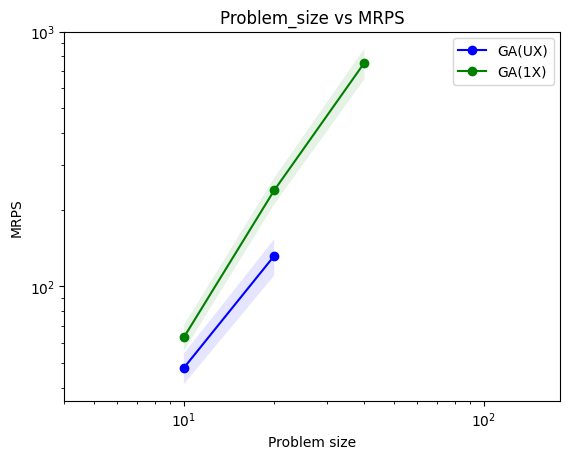

In [33]:
plt.figure()
plt.plot(
    problem_size[MRPS_leadingone_UX_average != None],
    MRPS_leadingone_UX_average[MRPS_leadingone_UX_average != None].astype(float),
    marker='o',
    color= 'b',
    label = "GA(UX)"
)

plt.fill_between(
    problem_size[MRPS_leadingone_UX_average != None],
    MRPS_leadingone_UX_average[MRPS_leadingone_UX_average != None].astype(float) + MRPS_leadingone_UX_std[MRPS_leadingone_UX_std != None].astype(float),
    MRPS_leadingone_UX_average[MRPS_leadingone_UX_average != None].astype(float) - MRPS_leadingone_UX_std[MRPS_leadingone_UX_std != None].astype(float),
    facecolor='b', 
    alpha=0.1
)

plt.plot(
    problem_size[MRPS_leadingone_1X_average != None],
    MRPS_leadingone_1X_average[MRPS_leadingone_1X_average != None].astype(float),
    marker='o',
    color= 'g',
    label = "GA(1X)"
)

plt.fill_between(
    problem_size[MRPS_leadingone_1X_average != None],
    MRPS_leadingone_1X_average[MRPS_leadingone_1X_average != None].astype(float) + MRPS_leadingone_1X_std[MRPS_leadingone_1X_std != None].astype(float),
    MRPS_leadingone_1X_average[MRPS_leadingone_1X_average != None].astype(float) - MRPS_leadingone_1X_std[MRPS_leadingone_1X_std != None].astype(float),
    facecolor='g', 
    alpha=0.1
)
plt.title("Problem_size vs MRPS")
plt.xlabel('Problem size')
plt.xlim(4, 180)
plt.ylabel('MRPS')
plt.xscale('log')
plt.yscale('log')
plt.legend()


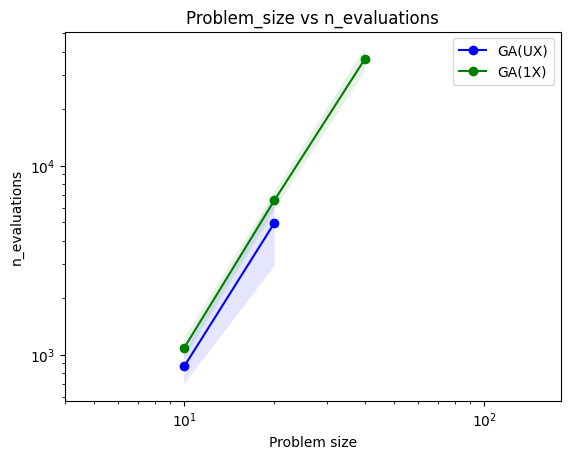

In [34]:
plt.figure()
plt.plot(
    problem_size[n_evaluations_leadingone_UX_average != None],
    n_evaluations_leadingone_UX_average[n_evaluations_leadingone_UX_average != None].astype(float),
    marker='o',
    color= 'b',
    label = "GA(UX)"
)

plt.fill_between(
    problem_size[n_evaluations_leadingone_UX_average != None],
    n_evaluations_leadingone_UX_average[n_evaluations_leadingone_UX_average != None].astype(float) + n_evaluations_leadingone_UX_std[n_evaluations_leadingone_UX_std != None].astype(float),
    n_evaluations_leadingone_UX_average[n_evaluations_leadingone_UX_average != None].astype(float) - n_evaluations_leadingone_UX_std[n_evaluations_leadingone_UX_std != None].astype(float),
    facecolor='b', 
    alpha=0.1
)

plt.plot(
    problem_size[n_evaluations_leadingone_1X_average != None],
    n_evaluations_leadingone_1X_average[n_evaluations_leadingone_1X_average != None].astype(float),
    marker='o',
    color= 'g',
    label = "GA(1X)"
)

plt.fill_between(
    problem_size[n_evaluations_leadingone_1X_average != None],
    n_evaluations_leadingone_1X_average[n_evaluations_leadingone_1X_average != None].astype(float) + n_evaluations_leadingone_1X_std[n_evaluations_leadingone_1X_std != None].astype(float),
    n_evaluations_leadingone_1X_average[n_evaluations_leadingone_1X_average != None].astype(float) - n_evaluations_leadingone_1X_std[n_evaluations_leadingone_1X_std != None].astype(float),
    facecolor='g', 
    alpha=0.1
)
plt.title("Problem_size vs n_evaluations")
plt.xlabel('Problem size')
plt.xlim(4, 180)
plt.ylabel('n_evaluations')
plt.xscale('log')
plt.yscale('log')
plt.legend()


## Concatenate-trap 5

### Uniform Crossover

In [35]:
problem_size  = np.array([10, 20, 40, 80, 160])
n_trials = 10

final_results_ctrap5_UX = {}
for num_parameters in tqdm(problem_size, desc = "Problem_size"):
    final_results_ctrap5_UX[f"problem_size {num_parameters}"] = []
    
    for i in tqdm(range (n_trials),desc = "bisection"):
        result = bisection(
            objective = concatenate_trap_5,
            variance= uniform_crossover,
            num_parameters = num_parameters, 
            ith_bisection = i
        )
        
        if result != (None,None):
            final_results_ctrap5_UX[f"problem_size {num_parameters}"].append(result)
        else:
            final_results_ctrap5_UX[f"problem_size {num_parameters}"] = [(None,None)]
            break
        
final_results_ctrap5_UX

Problem_size: 100%|██████████| 5/5 [1:05:11<00:00, 782.26s/it]


{'problem_size 10': [(906.0, 100566.0),
  (582.0, 93061.8),
  (834.0, 100080.0),
  (970.0, 100880.0),
  (1282.0, 101278.0),
  (734.0, 100558.0),
  (710.0, 100110.0),
  (502.0, 83783.8),
  (454.0, 79994.8),
  (706.0, 98275.2)],
 'problem_size 20': [(None, None)],
 'problem_size 40': [(None, None)],
 'problem_size 80': [(None, None)],
 'problem_size 160': [(None, None)]}

* **Đây là kết quả chạy thực nghiệm 10 lần bisection** (Mỗi problem size là 10 lần bisection)
* Kết quả: 
    * bên trái là MRPS 
    * bên phải là Average_number_of_evaluations của 1 bisection 
(Average_number_of_evaluations được tính bằng cách lấy mean của 10 lần chạy thành công trong một bisection)

In [36]:
final_results_ctrap5_UX_average = {}
final_results_ctrap5_UX_std = {}

for i in problem_size:
    if final_results_ctrap5_UX[f'problem_size {i}'] == [(None,None)]:
        final_results_ctrap5_UX_average[f'problem_size {i}'] = np.array([None,None])
        final_results_ctrap5_UX_std[f'problem_size {i}'] = np.array([None,None])
    
    else:
        final_results_ctrap5_UX_average[f'problem_size {i}'] = np.average(final_results_ctrap5_UX[f'problem_size {i}'], 
                                                                      axis = 0)
        final_results_ctrap5_UX_std[f'problem_size {i}'] = np.std(final_results_ctrap5_UX[f'problem_size {i}'], 
                                                              axis = 0)

final_results_ctrap5_UX_average, final_results_ctrap5_UX_std

({'problem_size 10': array([  768.  , 95858.76]),
  'problem_size 20': array([None, None], dtype=object),
  'problem_size 40': array([None, None], dtype=object),
  'problem_size 80': array([None, None], dtype=object),
  'problem_size 160': array([None, None], dtype=object)},
 {'problem_size 10': array([ 232.53214832, 7388.13873979]),
  'problem_size 20': array([None, None], dtype=object),
  'problem_size 40': array([None, None], dtype=object),
  'problem_size 80': array([None, None], dtype=object),
  'problem_size 160': array([None, None], dtype=object)})

* **Phần bên trên là kết quả trung bình**: 
    * Ứng với problem size: 
        * Bên trái là giá trị MRPS trung bình của 10 lần bisection
        * Bên phải là giá trị Average_number_of_evaluations trung bình của 10 lần bisection
* **Phần dưới là độ lệch chuẩn**:
    * Ứng với problem size: 
        * Bên trái là độ lệch chuẩn của MRPS của 10 lần bisection
        * Bên phải là độ lệch chuẩn của Average_number_of_evaluations trung bình của 10 lần bisection

In [37]:
MRPS_ctrap5_UX_average = np.array([values[0] for values in final_results_ctrap5_UX_average.values()])
MRPS_ctrap5_UX_std = np.array([values[0] for values in final_results_ctrap5_UX_std.values()])
n_evaluations_ctrap5_UX_average = np.array([values[1] for values in final_results_ctrap5_UX_average.values()])
n_evaluations_ctrap5_UX_std = np.array([values[1] for values in final_results_ctrap5_UX_std.values()])

### Onepoint Crossover

In [38]:
problem_size  = np.array([10, 20, 40, 80, 160])
n_trials = 10

final_results_ctrap5_1X = {}
for num_parameters in tqdm(problem_size, desc = "Problem_size"):
    final_results_ctrap5_1X[f"problem_size {num_parameters}"] = []
    
    for i in tqdm(range (n_trials),desc = "bisection"):
        result = bisection(
            objective = concatenate_trap_5,
            variance= onepoint_crossover,
            num_parameters = num_parameters, 
            ith_bisection = i
        )
        
        if result != (None,None):
            final_results_ctrap5_1X[f"problem_size {num_parameters}"].append(result)
        else:
            final_results_ctrap5_1X[f"problem_size {num_parameters}"] = [(None,None)]
            break
        
final_results_ctrap5_1X

Problem_size: 100%|██████████| 5/5 [1:08:45<00:00, 825.19s/it]


{'problem_size 10': [(258.0, 6321.0),
  (180.0, 4590.0),
  (136.0, 6487.2),
  (160.0, 4016.0),
  (258.0, 10732.8),
  (120.0, 2676.0),
  (140.0, 3836.0),
  (176.0, 7198.4),
  (96.0, 2822.4),
  (118.0, 2914.6)],
 'problem_size 20': [(326.0, 9030.2),
  (302.0, 8516.4),
  (288.0, 7056.0),
  (368.0, 10156.8),
  (320.0, 8608.0),
  (514.0, 13929.4),
  (514.0, 14649.0),
  (402.0, 10492.2),
  (240.0, 6096.0),
  (514.0, 16036.8)],
 'problem_size 40': [(1026.0, 34781.4),
  (870.0, 29580.0),
  (764.0, 25441.2),
  (734.0, 24222.0),
  (1028.0, 34849.2),
  (954.0, 31195.8),
  (806.0, 27887.6),
  (938.0, 32079.6),
  (844.0, 29455.6),
  (878.0, 29413.0)],
 'problem_size 80': [(None, None)],
 'problem_size 160': [(None, None)]}

* **Đây là kết quả chạy thực nghiệm 10 lần bisection** (Mỗi problem size là 10 lần bisection)
* Kết quả: 
    * bên trái là MRPS 
    * bên phải là Average_number_of_evaluations của 1 bisection 
(Average_number_of_evaluations được tính bằng cách lấy mean của 10 lần chạy thành công trong một bisection)

In [39]:
final_results_ctrap5_1X_average = {}
final_results_ctrap5_1X_std = {}

for i in problem_size:
    if final_results_ctrap5_1X[f'problem_size {i}'] == [(None,None)]:
        final_results_ctrap5_1X_average[f'problem_size {i}'] = np.array([None,None])
        final_results_ctrap5_1X_std[f'problem_size {i}'] = np.array([None,None])
    
    else:
        final_results_ctrap5_1X_average[f'problem_size {i}'] = np.average(final_results_ctrap5_1X[f'problem_size {i}'], 
                                                                      axis = 0)
        final_results_ctrap5_1X_std[f'problem_size {i}'] = np.std(final_results_ctrap5_1X[f'problem_size {i}'], 
                                                              axis = 0)

final_results_ctrap5_1X_average, final_results_ctrap5_1X_std

({'problem_size 10': array([ 164.2 , 5159.44]),
  'problem_size 20': array([  378.8 , 10457.08]),
  'problem_size 40': array([  884.2 , 29890.54]),
  'problem_size 80': array([None, None], dtype=object),
  'problem_size 160': array([None, None], dtype=object)},
 {'problem_size 10': array([  53.03168864, 2416.27016337]),
  'problem_size 20': array([  97.54260608, 3172.72063718]),
  'problem_size 40': array([  96.71173662, 3338.54610638]),
  'problem_size 80': array([None, None], dtype=object),
  'problem_size 160': array([None, None], dtype=object)})

* **Phần bên trên là kết quả trung bình**: 
    * Ứng với problem size: 
        * Bên trái là giá trị MRPS trung bình của 10 lần bisection
        * Bên phải là giá trị Average_number_of_evaluations trung bình của 10 lần bisection
* **Phần dưới là độ lệch chuẩn**:
    * Ứng với problem size: 
        * Bên trái là độ lệch chuẩn của MRPS của 10 lần bisection
        * Bên phải là độ lệch chuẩn của Average_number_of_evaluations trung bình của 10 lần bisection

In [40]:
MRPS_ctrap5_1X_average = np.array([values[0] for values in final_results_ctrap5_1X_average.values()])
MRPS_ctrap5_1X_std = np.array([values[0] for values in final_results_ctrap5_1X_std.values()])
n_evaluations_ctrap5_1X_average = np.array([values[1] for values in final_results_ctrap5_1X_average.values()])
n_evaluations_ctrap5_1X_std = np.array([values[1] for values in final_results_ctrap5_1X_std.values()])

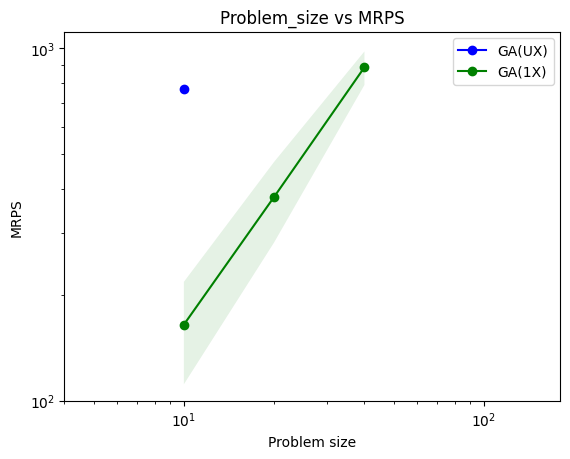

In [41]:
plt.figure()
plt.plot(
    problem_size[MRPS_ctrap5_UX_average != None],
    MRPS_ctrap5_UX_average[MRPS_ctrap5_UX_average != None].astype(float),
    marker='o',
    color= 'b',
    label = "GA(UX)"
)

plt.fill_between(
    problem_size[MRPS_ctrap5_UX_average != None],
    MRPS_ctrap5_UX_average[MRPS_ctrap5_UX_average != None].astype(float) + MRPS_ctrap5_UX_std[MRPS_ctrap5_UX_std != None].astype(float),
    MRPS_ctrap5_UX_average[MRPS_ctrap5_UX_average != None].astype(float) - MRPS_ctrap5_UX_std[MRPS_ctrap5_UX_std != None].astype(float),
    facecolor='b', 
    alpha=0.1
)

plt.plot(
    problem_size[MRPS_ctrap5_1X_average != None],
    MRPS_ctrap5_1X_average[MRPS_ctrap5_1X_average != None].astype(float),
    marker='o',
    color= 'g',
    label = "GA(1X)"
)

plt.fill_between(
    problem_size[MRPS_ctrap5_1X_average != None],
    MRPS_ctrap5_1X_average[MRPS_ctrap5_1X_average != None].astype(float) + MRPS_ctrap5_1X_std[MRPS_ctrap5_1X_std != None].astype(float),
    MRPS_ctrap5_1X_average[MRPS_ctrap5_1X_average != None].astype(float) - MRPS_ctrap5_1X_std[MRPS_ctrap5_1X_std != None].astype(float),
    facecolor='g', 
    alpha=0.1
)
plt.title("Problem_size vs MRPS")
plt.xlabel('Problem size')
plt.xlim(4, 180)
plt.ylabel('MRPS')
plt.xscale('log')
plt.yscale('log')
plt.legend()

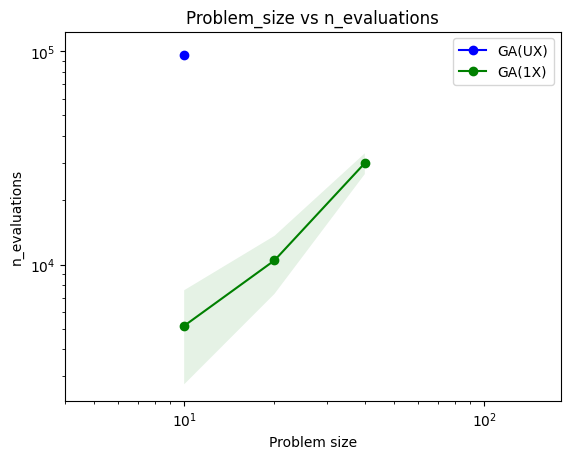

In [42]:
plt.figure()
plt.plot(
    problem_size[n_evaluations_ctrap5_UX_average != None],
    n_evaluations_ctrap5_UX_average[n_evaluations_ctrap5_UX_average != None].astype(float),
    marker='o',
    color= 'b',
    label = "GA(UX)"
)

plt.fill_between(
    problem_size[n_evaluations_ctrap5_UX_average != None],
    n_evaluations_ctrap5_UX_average[n_evaluations_ctrap5_UX_average != None].astype(float) + n_evaluations_ctrap5_UX_std[n_evaluations_ctrap5_UX_std != None].astype(float),
    n_evaluations_ctrap5_UX_average[n_evaluations_ctrap5_UX_average != None].astype(float) - n_evaluations_ctrap5_UX_std[n_evaluations_ctrap5_UX_std != None].astype(float),
    facecolor='b', 
    alpha=0.1
)

plt.plot(
    problem_size[n_evaluations_ctrap5_1X_average != None],
    n_evaluations_ctrap5_1X_average[n_evaluations_ctrap5_1X_average != None].astype(float),
    marker='o',
    color= 'g',
    label = "GA(1X)"
)

plt.fill_between(
    problem_size[n_evaluations_ctrap5_1X_average != None],
    n_evaluations_ctrap5_1X_average[n_evaluations_ctrap5_1X_average != None].astype(float) + n_evaluations_ctrap5_1X_std[n_evaluations_ctrap5_1X_std != None].astype(float),
    n_evaluations_ctrap5_1X_average[n_evaluations_ctrap5_1X_average != None].astype(float) - n_evaluations_ctrap5_1X_std[n_evaluations_ctrap5_1X_std != None].astype(float),
    facecolor='g', 
    alpha=0.1
)
plt.title("Problem_size vs n_evaluations")
plt.xlabel('Problem size')
plt.xlim(4, 180)
plt.ylabel('n_evaluations')
plt.xscale('log')
plt.yscale('log')
plt.legend()